Type of glass: (class attribute)
-- 1 building_windows_float_processed

-- 2 building_windows_non_float_processed

-- 3 vehicle_windows_float_processed

-- 4 vehicle_windows_non_float_processed (Não tem nesse dataset)

-- 5 containers

-- 6 tableware

-- 7 headlamps


## Importando as bibliotecas necessárias
 Aqui carregamos as bibliotecas essenciais para manipular dados (pandas, numpy),
 criar o modelo (DecisionTreeClassifier), avaliar o desempenho (métricas) e visualizar gráficos (seaborn, matplotlib)

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Carregar o dataset

In [5]:
df = pd.read_csv('/workspaces/projeto_ML_algoritmo/glass.csv')

print(df.head())


        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


## Explorar o dataset
Verificando informações gerais do dataset: tipos de dados, quantidade de entradas e colunas

In [6]:
print("\nInformações gerais:")
print(df.info())

print("\nVerificar valores nulos:")
print(df.isnull().sum())

print("\nDistribuição da coluna alvo (type):")
print(df['Type'].value_counts())



Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None

Verificar valores nulos:
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

Distribuição da coluna alvo (type):
Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


## Separar X (características) e y (alvo)

In [7]:
X = df.drop('Type', axis=1)
y = df['Type']

## Dividir em treino e teste

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## Criar o modelo de Árvore de Decisão

In [9]:
clf = DecisionTreeClassifier(random_state=42)

## Treinar o modelo

In [10]:
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## Previsões

In [11]:
y_pred = clf.predict(X_test)

## Avaliação do modelo


Acurácia: 0.7384615384615385



Relatório de Classificação:
               precision    recall  f1-score   support

           1       0.78      0.86      0.82        21
           2       0.82      0.61      0.70        23
           3       0.33      0.40      0.36         5
           5       0.75      0.75      0.75         4
           6       0.50      0.67      0.57         3
           7       0.82      1.00      0.90         9

    accuracy                           0.74        65
   macro avg       0.67      0.71      0.68        65
weighted avg       0.75      0.74      0.74        65


Matriz de Confusão:


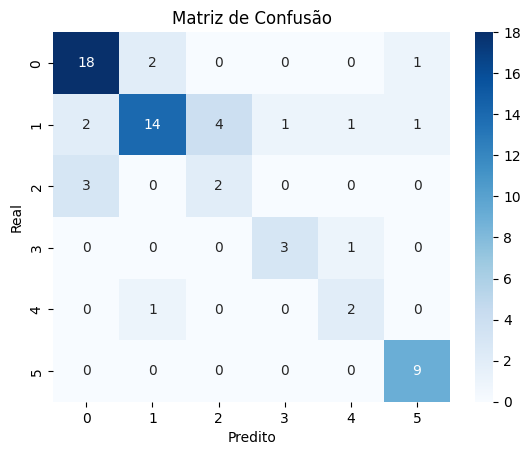

In [12]:
print("\nAcurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))
print("\nMatriz de Confusão:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

 A acurácia mostra a porcentagem total de acertos do modelo, mas quando temos um dataset com classes desbalanceadas
 (ou seja, algumas classes têm muito mais exemplos que outras), o modelo tende a acertar mais as classes maiores
 e errar mais as menores. Isso faz com que a acurácia possa parecer boa, mas o desempenho em classes pequenas fique ruim.
 Por isso é importante balancear o dataset (com técnicas como SMOTE ou class_weight), para garantir que o modelo aprenda
 de forma equilibrada e consiga classificar corretamente tanto as classes maiores quanto as menores.

# Balanceamento usando class_weight='balanced'

In [13]:
clf_weighted = DecisionTreeClassifier(random_state=42, class_weight='balanced')
clf_weighted.fit(X_train, y_train)

# Previsões
y_pred_weighted = clf_weighted.predict(X_test)

 Ajustando a os pesos das classes durante o treinamento do modelo. Isso faz com que a classe minoritária tenha um peso maior durante a aprendizagem, compensando o desequilíbrio inicial no conjunto de dados.
 Garantindo que o modelo seja treinado de maneira justa e eficaz.

In [14]:
print("\nAcurácia (class_weight='balanced'):", accuracy_score(y_test, y_pred_weighted))
print("\nRelatório de Classificação (class_weight='balanced'):\n", classification_report(y_test, y_pred_weighted))


Acurácia (class_weight='balanced'): 0.7076923076923077

Relatório de Classificação (class_weight='balanced'):
               precision    recall  f1-score   support

           1       0.75      0.71      0.73        21
           2       0.71      0.65      0.68        23
           3       0.43      0.60      0.50         5
           5       0.50      0.75      0.60         4
           6       0.75      1.00      0.86         3
           7       1.00      0.78      0.88         9

    accuracy                           0.71        65
   macro avg       0.69      0.75      0.71        65
weighted avg       0.73      0.71      0.71        65



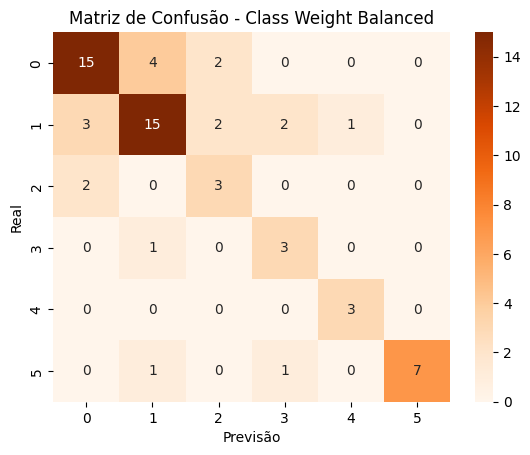

In [15]:
conf_matrix_weighted = confusion_matrix(y_test, y_pred_weighted)
sns.heatmap(conf_matrix_weighted, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Class Weight Balanced')
plt.show()

Comparando os dois modelos, o modelo SEM balanceamento teve uma acurácia de 74% e o modelo COM class_weight='balanced' teve uma acurácia um pouco menor, de aproximadamente 71%. No entanto, ao analisar o relatório de classificação,
podemos observar que o modelo com balanceamento apresentou um f1-score melhor para as classes minoritárias (como as classes 3, 5 e 6),
conseguindo melhorar a sensibilidade (recall) nessas classes.
Isso mostra que o modelo balanceado é mais justo ao classificar todas as classes, mesmo que a acurácia total seja levemente menor.
O balanceamento ajuda a reduzir o viés do modelo, evitando que ele foque apenas nas classes maiores e negligencie as menores.
Em problemas com classes desbalanceadas, priorizar o equilíbrio entre as classes (f1-score macro/micro) é mais adequado do que apenas a acurácia.


## Visualizar a Árvore de Decisão

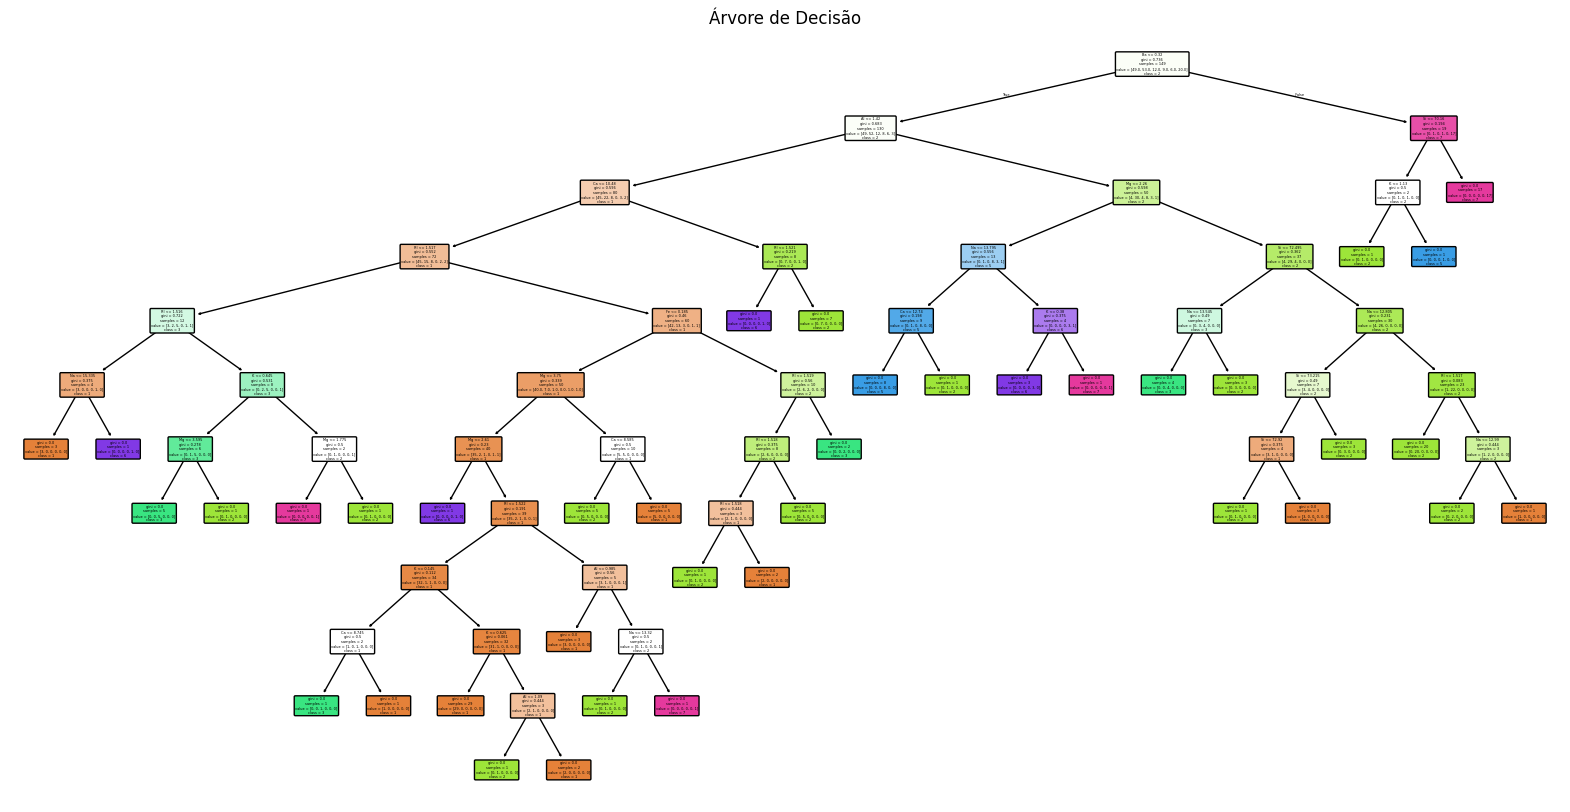

In [16]:
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=[str(cls) for cls in np.unique(y)], filled=True, rounded=True)
plt.title('Árvore de Decisão')
plt.show()

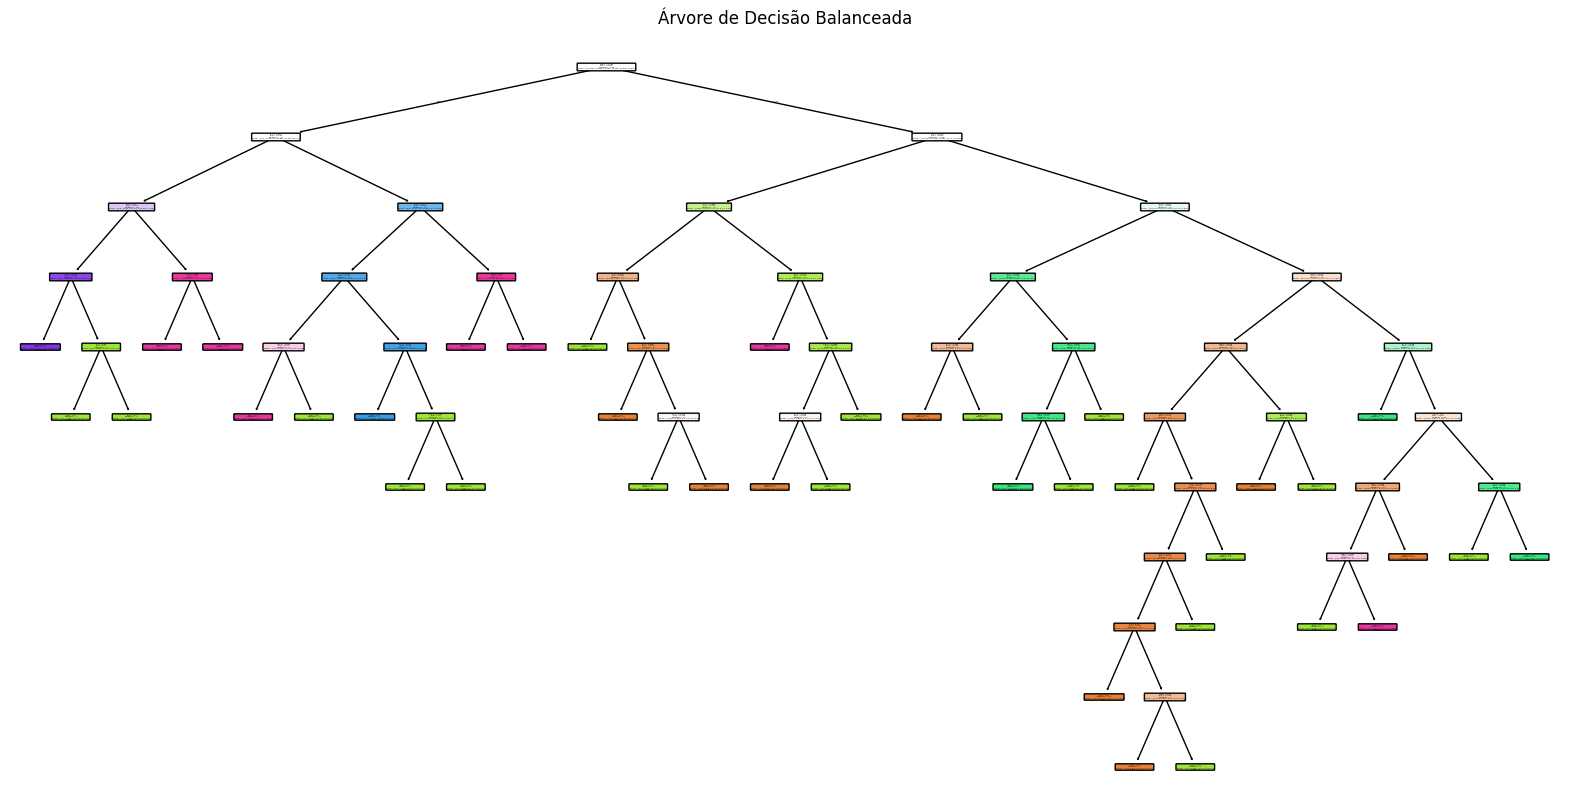

In [17]:
class_labels = [str(cls) for cls in clf_weighted.classes_]

plt.figure(figsize=(20,10))
plot_tree(clf_weighted,
          feature_names=X.columns,
          class_names=class_labels,
          filled=True,
          rounded=True)
plt.title('Árvore de Decisão Balanceada')
plt.show()

 A árvore de decisão balanceada atingiu uma profundidade máxima (nível) de 10.
 Isso significa que o caminho mais longo da raiz até uma folha possui 10 divisões (ou decisões).
 Árvores com maior profundidade podem se ajustar bem aos dados de treino, mas também podem correr risco de overfitting,
 por isso é sempre importante analisar o desempenho em dados de teste.